We will be using the flight dataset in this notebook.

Link: https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqa0I0SFI3SEJJYTFvRlExWXNvNUhrYnp5ODR0QXxBQ3Jtc0ttRWloeWljaVdQNkttc3R0NkdFSVlid0xFcXpKbFpDdTlnRFlKWlVFQ0dkYS1FV1RWVnZvdmJLbVRJY2ZKWTEwOEtVSVUyRFpiR215U2NGdHdLT2ZabVpLQkVvQTZPN0dyUjdfQ2YyM3lqY3V5RGxlVQ&q=https%3A%2F%2Fgithub.com%2Fkrishnaik06%2F5-Days-Live-EDA-and-Feature-Engineering%2Ftree%2Fmain%2FFlight%2520Prediction&v=v5dqavbyE-I

## Getting things ready

In [260]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 5)
%matplotlib inline

In [261]:
# loading and displaying dataset head
df_train = pd.read_excel('/content/flight-train.xlsx')
df_test = pd.read_excel('/content/flight-test.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [262]:
# seeing the shape
print(f"df_train : {df_train.shape}")
print(f"df_test : {df_test.shape}")

df_train : (10683, 11)
df_test : (2671, 10)


In [263]:
# head of test dataset
df_test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


The test data don't contain the target feature i.e. price (as the data is taken from kaggle).

### Combining the train and test dataset

In [264]:
df = pd.concat([df_train, df_test], axis = 0)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [265]:
# checking data columns
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [266]:
# seeing  the types of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.7+ MB


Only target feature i.e. Price is numerical.

In [269]:
# checking the null values
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [270]:
# seeing the number of categories present in each category
uniques = {}

for feat in df:
  no_of_cats = len(df[feat].unique())
  print(f"{feat} : {no_of_cats} unique")
  # not including the features with high categories in the dict that we will use for visualization
  if feat not in ['Dep_Time', 'Duration', 'Arrival_Time', 'Price']:
    uniques[feat] = no_of_cats

Airline : 12 unique
Date_of_Journey : 44 unique
Source : 5 unique
Destination : 6 unique
Route : 133 unique
Dep_Time : 223 unique
Arrival_Time : 1451 unique
Duration : 374 unique
Total_Stops : 6 unique
Additional_Info : 10 unique
Price : 1871 unique


<Axes: >

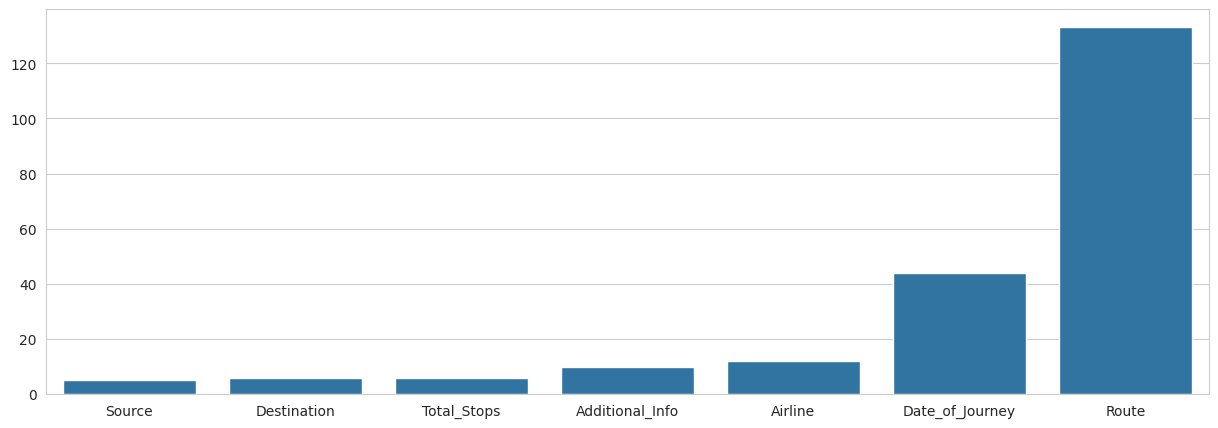

In [220]:
# visualizing the  number of categories for columns that have less categories
uniques = dict(sorted(uniques.items(), key = lambda x: x[1]))
sns.barplot(x = uniques.keys(), y = uniques.values())

# Feature Engineering

#### Date_of_journey feature
This feature contains information i.e data, month, year. We've to create 3 new features from this feature i.e. day, month and year.

In [221]:
df['Date_of_Journey']

0       24/03/2019
1        1/05/2019
2        9/06/2019
3       12/05/2019
4       01/03/2019
           ...    
2666     6/06/2019
2667    27/03/2019
2668     6/03/2019
2669     6/03/2019
2670    15/06/2019
Name: Date_of_Journey, Length: 13354, dtype: object

In [222]:
# Encoding the feature by creating 3 new features i.e Data, month and year of the journey.
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['year'] = df['Date_of_Journey'].str.split('/').str[2]

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [223]:
# dropping the original feature to use less compute from on because we don't require this feature
df = df.drop('Date_of_Journey', axis = 1)

#### Arrival_Time Feature

In [224]:
df['Arrival_Time'].head(2)

0    01:10 22 Mar
1           13:15
Name: Arrival_Time, dtype: object

In [225]:
# As we have 2 type of values in the feature i.e. only time and time with date and month.
# We are only interested in time so, let's extract that and assign to a 2 new feature (hour and mins)
df['Arrival_Hour'] = df['Arrival_Time'].apply(lambda x: x.split(' ')[0].split(':')[0])
df['Arrival_Min'] = df['Arrival_Time'].apply(lambda x: x.split(' ')[0].split(':')[1])

In [226]:
# seeing the data now
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019,13,15


In [227]:
# dropping the feature
df = df.drop('Arrival_Time', axis = 1)

#### Dep_Time Feature

In [228]:
df['Dep_Time'].head(2)

0    22:20
1    05:50
Name: Dep_Time, dtype: object

In [229]:
# As we have 2 type of values in the feature i.e. only time and time with date and month.
# We are only interested in time so, let's extract that and assign to a 2 new feature (hour and mins)
df['Dep_Hour'] = df['Dep_Time'].apply(lambda x: x.split(' ')[0].split(':')[0])
df['Dep_Min'] = df['Dep_Time'].apply(lambda x: x.split(' ')[0].split(':')[1])

In [230]:
# seeing the data now
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,03,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,05,2019,13,15,05,50


In [231]:
# dropping the feature
df = df.drop('Dep_Time', axis = 1)

#### Duration Feature

In [232]:
# Converting the duration into minutes
# picking the hour part without the last 'h' char
hours_extracter = lambda x: int(x.split(' ')[0][:-1])
# picking the min part without the last 'm' char and using 0 where mins are not present
mins_extracter = lambda x: int(x.split(' ')[1][:-1] if len(x.split(' ')) > 1 else 0)

df['Duration_Min'] = (df['Duration'].apply(hours_extracter) * 60) + df['Duration'].apply(mins_extracter)

In [233]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,03,2019,01,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,05,2019,13,15,05,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,06,2019,04,25,09,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,05,2019,23,30,18,05,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,01,03,2019,21,35,16,50,285


In [234]:
# dropping the feature
df = df.drop('Duration', axis = 1)

#### Total_Stops Feature

In [235]:
# seeing the unique categories present
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [236]:
# checking the null values
df['Total_Stops'].isnull().sum()

1

We can use mode to replace the 1 na value.

In [237]:
# seeing  what is the mode
df['Total_Stops'].mode()[0]

'1 stop'

In [238]:
# imputing with mode and doing ordinal number encoding for this feature
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0]).map({'non-stop': 1, '1 stop': 2, '2 stops': 3, '3 stops': 4, '4 stops': 5})
df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,1,No info,3897.0,24,03,2019,01,10,22,20,170


In [239]:
# checking if there're some null values
df['Total_Stops'].isnull().sum()

0

#### Airline, Source, Destination, Additional_Info Features
Encoding these features using OneHotEncoder as these are nominal. One other option is of doing the target guided ordinal encoding (for that we've to see the relationship of the features with the target feature).

For now we're gonna do OneHotEncoding.

In [240]:
df.shape

(13354, 15)

In [241]:
# Seeing number of categories present in each feature (mentioned)
total_cats = 0

# looping through each feature and performing the computation for our desired features
for feat in df.columns:
  if feat in ['Airline', 'Source', 'Destination', 'Additional_Info']:
    # calculating total number of unique categories
    cats = len(df[feat].unique())

    print(f"{feat} : {cats}")
    total_cats += cats

print(f"\nTotal categories : {total_cats}")
print(f"Features that will be added : {total_cats - 8}")      # 4 features itself and 4 that the first ones of each feature
print(f"Total Features : {14 + (total_cats - 8)}")      # we have 14 previous features

Airline : 12
Source : 5
Destination : 6
Additional_Info : 10

Total categories : 33
Features that will be added : 25
Total Features : 39


In [242]:
# using get_dummies to encode the features
df = pd.get_dummies(df, columns = ['Airline', 'Source', 'Destination', 'Additional_Info'], drop_first = True)

In [243]:
df.head(1)

,Route,Total_Stops,Price,Date,Month,year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,BLR → DEL,1,3897.0,24,03,2019,01,10,22,20,...,1,0,0,0,0,0,0,0,1,0


In [244]:
df.shape

(13354, 40)

So, that's what we wanted.

#### Route Feature


In [245]:
# seeing the unique categories
print(f"Categories : {len(df['Route'].unique())}")
df['Route'].unique()

Categories : 133


array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

I think we can do the target guided ordinal encoding. Let's see the relationship.

<Axes: xlabel='Route'>

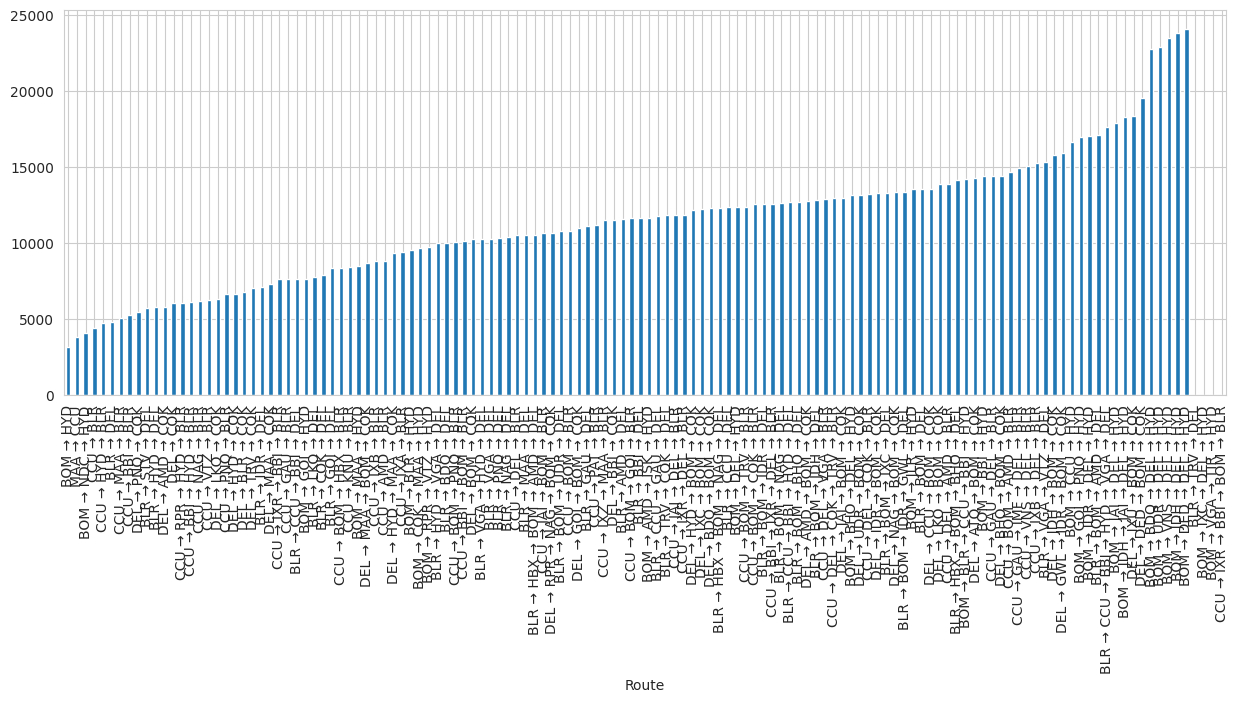

In [246]:
df.groupby('Route')['Price'].median().sort_values().plot.bar()

So, here we got the relationship. Let's create a dictionary and map the values.

In [247]:
# computing median for all the categories and sorting the series (containing medians as values and category names as indexes) and sorting that based on medians.
route_sorted_series = df.groupby('Route')['Price'].median().sort_values()

# As we have medians sorted as ascending order, using enumerate to get the index and assigning to the relevant category and that's how...
# the encoding is getting performed
df['Route'] = df['Route'].map({cat:ordinal_val for ordinal_val, (cat, median) in enumerate(route_sorted_series.items(), 1)})

In [248]:
# Seeing what we got
df.head()

,Route,Total_Stops,Price,Date,Month,year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,6.0,1,3897.0,24,03,2019,01,10,22,20,...,1,0,0,0,0,0,0,0,1,0
1,25.0,3,7662.0,1,05,2019,13,15,05,50,...,0,0,0,0,0,0,0,0,1,0
2,100.0,3,13882.0,9,06,2019,04,25,09,25,...,0,0,0,0,0,0,0,0,1,0
3,16.0,2,6218.0,12,05,2019,23,30,18,05,...,0,0,0,0,0,0,0,0,1,0
4,51.0,2,13302.0,01,03,2019,21,35,16,50,...,1,0,0,0,0,0,0,0,1,0


In [249]:
# seeing null values
df.isnull().sum()

Route                                              1
Total_Stops                                        0
Price                                           2671
Date                                               0
Month                                              0
year                                               0
Arrival_Hour                                       0
Arrival_Min                                        0
Dep_Hour                                           0
Dep_Min                                            0
Duration_Min                                       0
Airline_Air India                                  0
Airline_GoAir                                      0
Airline_IndiGo                                     0
Airline_Jet Airways                                0
Airline_Jet Airways Business                       0
Airline_Multiple carriers                          0
Airline_Multiple carriers Premium economy          0
Airline_SpiceJet                              

In [250]:
# filling null value of route feature with the mode
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])

## Target feature Separation

In [251]:
# extracting the target variable
y = df['Price']
df = df.drop('Price', axis = 1)

In [252]:
y

0        3897.0
1        7662.0
2       13882.0
3        6218.0
4       13302.0
         ...   
2666        NaN
2667        NaN
2668        NaN
2669        NaN
2670        NaN
Name: Price, Length: 13354, dtype: float64

## Data type correction

In [253]:
# seeing data types of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Route                                         13354 non-null  float64
 1   Total_Stops                                   13354 non-null  int64  
 2   Date                                          13354 non-null  object 
 3   Month                                         13354 non-null  object 
 4   year                                          13354 non-null  object 
 5   Arrival_Hour                                  13354 non-null  object 
 6   Arrival_Min                                   13354 non-null  object 
 7   Dep_Hour                                      13354 non-null  object 
 8   Dep_Min                                       13354 non-null  object 
 9   Duration_Min                                  13354 non-null  

In [254]:
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Route                                         13354 non-null  int64
 1   Total_Stops                                   13354 non-null  int64
 2   Date                                          13354 non-null  int64
 3   Month                                         13354 non-null  int64
 4   year                                          13354 non-null  int64
 5   Arrival_Hour                                  13354 non-null  int64
 6   Arrival_Min                                   13354 non-null  int64
 7   Dep_Hour                                      13354 non-null  int64
 8   Dep_Min                                       13354 non-null  int64
 9   Duration_Min                                  13354 non-null  int64
 10  Airline_Air

## Data Splitting
We want to keep all those entries in the test dataset where the price was missing. And we separated the target feature before this because we need to do data type correction and that can't be performed when we've null values (my observation).

In [255]:
# rejoining the target feature with the dataset
df = pd.concat([df, y], axis = 1)
# seperating train and  test datasets
df_train = df[~df['Price'].isnull()]     # the ~ sign means not
df_test = df[df['Price'].isnull()]

df_train

,Route,Total_Stops,Date,Month,year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Min,...,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Price
0,6,1,24,3,2019,1,10,22,20,170,...,0,0,0,0,0,0,0,1,0,3897.0
1,25,3,1,5,2019,13,15,5,50,445,...,0,0,0,0,0,0,0,1,0,7662.0
2,100,3,9,6,2019,4,25,9,25,1140,...,0,0,0,0,0,0,0,1,0,13882.0
3,16,2,12,5,2019,23,30,18,5,325,...,0,0,0,0,0,0,0,1,0,6218.0
4,51,2,1,3,2019,21,35,16,50,285,...,0,0,0,0,0,0,0,1,0,13302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4,1,9,4,2019,22,25,19,55,150,...,0,0,0,0,0,0,0,1,0,4107.0
10679,4,1,27,4,2019,23,20,20,45,155,...,0,0,0,0,0,0,0,1,0,4145.0
10680,6,1,27,4,2019,11,20,8,20,180,...,0,0,0,0,0,0,0,1,0,7229.0
10681,6,1,1,3,2019,14,10,11,30,160,...,0,0,0,0,0,0,0,1,0,12648.0


## train_test_split
Performing this step on the df_train because in the test dataset we don't have the target feature so we can't do evaluation.

In [256]:
# importing libraries and  performing train test split
from sklearn.model_selection import train_test_split
# using x and y (generating on spot) for training data splittion
x_train, x_test, y_train, y_test = train_test_split(df_train.drop('Price', axis = 1), df_train['Price'], test_size = 0.33, random_state = 20)

print(f"x_train.shape = {x_train.shape} , y_train.shape = {y_train.shape} \
      \n\nx_test.shape = {x_test.shape} , y_test.shape = {y_test.shape}")

x_train.shape = (7157, 39) , y_train.shape = (7157,)       

x_test.shape = (3526, 39) , y_test.shape = (3526,)


In [257]:
# putting a glance on the variables
x_test

,Route,Total_Stops,Date,Month,year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Min,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
10335,6,1,24,5,2019,20,45,17,45,180,...,0,0,0,0,0,0,0,0,1,0
4063,47,2,9,6,2019,12,35,19,15,1040,...,0,0,0,0,0,1,0,0,0,0
5255,24,2,1,6,2019,9,25,20,40,765,...,0,0,0,0,0,0,0,0,1,0
10144,58,2,24,5,2019,20,45,18,55,1550,...,0,0,0,0,0,1,0,0,0,0
3204,85,3,27,3,2019,19,45,19,10,1475,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,47,2,18,5,2019,19,0,10,0,540,...,0,0,0,0,0,0,0,0,1,0
1631,6,1,15,6,2019,18,10,15,15,175,...,0,0,0,0,0,1,0,0,0,0
4766,52,2,1,5,2019,9,45,17,0,1005,...,0,0,0,0,0,0,0,0,1,0
4008,95,3,1,6,2019,12,35,14,35,1320,...,0,0,0,0,0,0,0,0,1,0


The shapes are as intended.

## Scaling the dataset
When we've all the categories as encoded, it can be good to scale the dataset. (More info in the ML section of this dataset. File will be uploaded in the same github repo.)

In [258]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# scaling the training data (present)
x_train = scaler.fit_transform(x_train)

# scaling the testing data (present)
x_test = scaler.transform(x_test)

In [259]:
# putting a glance
x_test

array([[-1.03557109, -1.21253169,  1.23397801, ..., -0.17891768,
         0.52620873,  0.        ],
       [ 0.27295408,  0.26887652, -0.53644549, ..., -0.17891768,
        -1.90038656,  0.        ],
       [-0.46109663,  0.26887652, -1.48067136, ..., -0.17891768,
         0.52620873,  0.        ],
       ...,
       [ 0.43253032,  0.26887652, -1.48067136, ..., -0.17891768,
         0.52620873,  0.        ],
       [ 1.80488598,  1.75028474, -1.48067136, ..., -0.17891768,
         0.52620873,  0.        ],
       [-1.03557109, -1.21253169,  0.17172391, ..., -0.17891768,
         0.52620873,  0.        ]])

## Data ready for model. (feature selection is remaining...)